## 1. torch initialize

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.ToTensor()

# constraints
n_epochs = 100
batch_size = 256
lr = 0.001

## 2. Train Set and Train Loader

In [2]:
train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True
)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.89MB/s]


## 3. Test Set and Test Loader and Accuracy

In [3]:
test_set = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False
)

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

## 4. Define Model

In [6]:
from torch import nn

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

## 5. Create Model And Optimizer

In [7]:
from torch.optim import SGD

model = Model(28 * 28 * 1, 1024).to('cuda')
optimizer = SGD(model.parameters(), lr = lr)

## 6. Training

In [8]:
loss_fn = nn.CrossEntropyLoss()
train_accs = []
test_accs = []

for epoch in range(n_epochs):
  total_loss = 0.

  for data in train_loader:
    model.zero_grad()

    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = loss_fn(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  # print total loss for epoch
  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

  train_accs.append(accuracy(model, train_loader))
  test_accs.append(accuracy(model, test_loader))


Epoch   0 | Loss: 539.4335515499115
Epoch   1 | Loss: 535.9674732685089
Epoch   2 | Loss: 532.4120099544525
Epoch   3 | Loss: 528.7028298377991
Epoch   4 | Loss: 524.7245454788208
Epoch   5 | Loss: 520.3864593505859
Epoch   6 | Loss: 515.5854535102844
Epoch   7 | Loss: 510.2228846549988
Epoch   8 | Loss: 504.1994342803955
Epoch   9 | Loss: 497.39736890792847
Epoch  10 | Loss: 489.6946179866791
Epoch  11 | Loss: 481.0281435251236
Epoch  12 | Loss: 471.32168841362
Epoch  13 | Loss: 460.52759754657745
Epoch  14 | Loss: 448.58919727802277
Epoch  15 | Loss: 435.6132963895798
Epoch  16 | Loss: 421.61955869197845
Epoch  17 | Loss: 406.81906378269196
Epoch  18 | Loss: 391.4255050420761
Epoch  19 | Loss: 375.7904793024063
Epoch  20 | Loss: 360.2449916601181
Epoch  21 | Loss: 345.05585610866547
Epoch  22 | Loss: 330.6469441652298
Epoch  23 | Loss: 317.00219655036926
Epoch  24 | Loss: 304.3328278064728
Epoch  25 | Loss: 287.50771498680115
Epoch  26 | Loss: 270.01320695877075
Epoch  27 | Loss: 254

## 7. Visualize

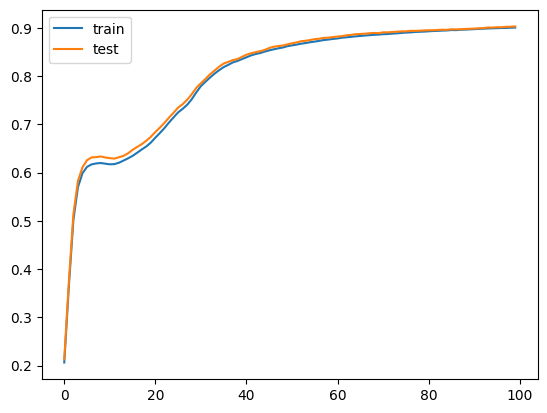

In [9]:
import numpy as np
from matplotlib import pyplot as plt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

plot_acc(train_accs=train_accs, test_accs=test_accs, label1='train', label2='test')